# 指数分布とハザード関数

exponential distributionの確率密度関数は

$$
f_X(x|\lambda) = \lambda \exp(-\lambda x), x > 0
$$

分布関数は

$$
1 - \exp(-\lambda x)
$$

これはガンマ分布の特別な場合で、$G_a(1, 1/\lambda)$で表される。

meanは$1 / \lambda$, varianceは$1/\lambda^2$で表される。

モーメント関数は

$$
M_X(t) = \frac{\lambda}{\lambda - t}
$$

特性関数は
$$
\phi_X(t) = \frac{\lambda}{\lambda - it}
$$


指数分布は生存時間の分布として用いられることがある。時間sを超えて生存する確率を$P(X > s) = \exp(-\lambda s)$とした時

$$
\begin{aligned}
P(X\geq s + t|X \geq s) &= \frac{P(X \geq s + t, X \geq s)}{P(X \geq s} = \frac{P(X \geq s + t)}{P(X \geq s}\\
&= \exp(s + t)/\exp(s) = P(X \geq t)
\end{aligned}
$$

無記憶性が指数分布に成り立っていると理解できる。

### ハザード分布の導出

指数分布を離れて、Xが非負の連続型確率変数とし、その密度関数を$f(x)$, 分布関数を$F(x)$とする。Xを故障する時間とみなす。x時間まで動作して次の$x + \Delta$時間までに故障する条件付確率は

$$
\begin{aligned}
P(x < X \leq x + \Delta | X > x) &= \frac{P(x < X \leq x + \Delta, X > x)}{P(X > x)}\\
&= \frac{P(x < X \leq x + \Delta)}{P(X > x)} = \frac{F(x + \Delta) - F(x)}{1 - F(x)}
\end{aligned}
$$

この時両辺を$\Delta$で割って$\Delta$を小さくすると、

$$
\lim_{\Delta \to 0}\frac{1}{\Delta}P(x < X \leq x + \Delta|X > x) = \frac{f(x)}{1 - F(x)} = \lambda(x)
$$

これがハザード関数。xまで動作している条件の元で次の瞬間に故障する確率密度を表している。

次にこのハザード関数を積分すると

$$
\begin{aligned}
\int^x_0 \lambda(t)dt = \int^x_0 \frac{f(t)}{1 - F(t)}dt = [- \log(1 - F(t))]^x_0
\end{aligned}
$$

Then,

$$
\begin{aligned}
F(x) &= 1 - \exp\left\{- \int^x_0 \lambda(t)dt \right\}\\
f(x) &= \lambda(x)\exp\left\{- \int^x_0 \lambda(t)dt \right\}
\end{aligned}
$$

指数分布の場合、$\lambda(x) = \lambda$と一定となる。これは時間の経過関係なく故障率は一定という場合であり、あまり自然ではない。時間の経過とともに故障しやすくなる場合や故障しなくなる場合はワイブル分布が用いられる。

$$
\lambda(x) = abx^{b-1}
$$
$$
f(x| a, b) = abx^{b-1}\exp(-ax^b), x > 0
$$


## scipy.stats.expon

```
expon.pdf(x, loc, scale)
```
は
```
expon.pdf(y) / scale with y = (x - loc) / scale.
```
と等しい。

In [1]:
import sys
print(sys.version)

3.7.4 (default, Sep  7 2019, 18:45:40) 
[Clang 9.0.0 (clang-900.0.39.2)]


In [2]:
from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [3]:
plt.style.use('ggplot')

In [4]:
mean, var, skew, kurt = expon.stats(moments='mvsk')

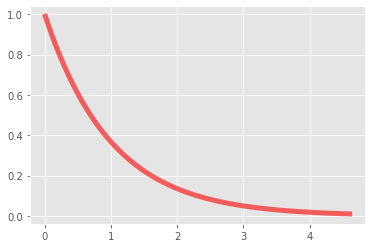

In [5]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x),'r-', lw=5, alpha=0.6, label='expon pdf');

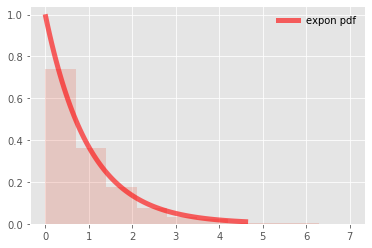

In [6]:
r = expon.rvs(size=1000)

fig, ax = plt.subplots()
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.plot(x, expon.pdf(x),'r-', lw=5, alpha=0.6, label='expon pdf')
ax.legend(loc='best', frameon=False);

In [7]:
### mean = 1/5の指数分布

exponential = expon(scale = 1/5)
r = exponential.rvs(size=1000)
np.mean(r)

0.1945288408882624

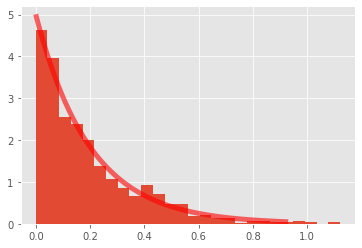

In [8]:
x = np.linspace(exponential.ppf(0.01), exponential.ppf(0.99), 1000)
plt.hist(r, bins = 'auto', density = True)
plt.plot(x, exponential.pdf(x),'r-', lw=5, alpha=0.6, label='expon pdf');

In [9]:
def exp_pdf(x, scale = 1/5):
    tmp_lambda = 1/scale
    return tmp_lambda*np.exp(- tmp_lambda*x)

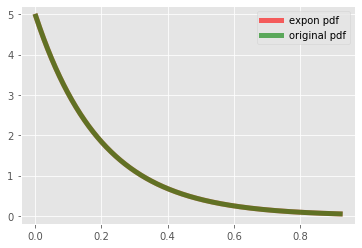

In [10]:
plt.plot(x, exponential.pdf(x),'r-', lw=5, alpha=0.6, label='expon pdf')
plt.plot(x, exp_pdf(x),'g-', lw=5, alpha=0.6, label='original pdf')
plt.legend();

### fitting

In [11]:
x = expon.freeze(scale = 1/5).rvs(size = 1000)
eps = scipy.stats.norm.rvs(size = 1000)/20
y = x + eps
y = np.clip(y, 0.0001, None ,out = y)

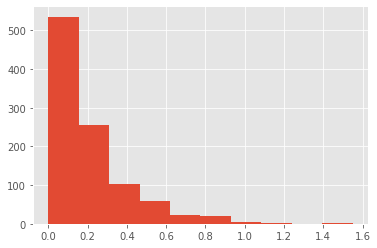

In [12]:
plt.hist(y);

In [13]:
np.mean(y)

0.20444735753558504

In [14]:
fit_parameter = expon.fit(y)
print(fit_parameter)

(0.0001, 0.20434735753558506)


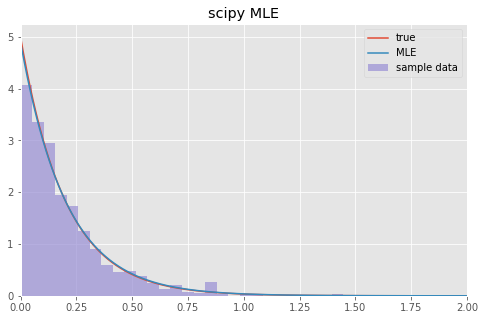

In [15]:
frozen_expon = expon.freeze(*fit_parameter)
x = np.linspace(0, 2, 1000)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1, xlim=(0, 2), title="scipy MLE")
ax.plot(x, expon.freeze(scale = 1/5).pdf(x), label="true")
ax.plot(x, frozen_expon.pdf(x), label="MLE")
ax.hist(y, bins=30, alpha=0.7, density=True, label="sample data")
ax.legend()
plt.show()

## Sample Dataを使ったexponential distributionのMLE

心臓移植のsurvival datasetを用いたMLEを紹介する。

In [16]:
import numpy as np
import scipy.stats as st
import statsmodels.datasets
import matplotlib.pyplot as plt
%matplotlib inline
data = statsmodels.datasets.heart.load_pandas().data

In [17]:
data.head()

,survival,censors,age
0,15.0,1.0,54.3
1,3.0,1.0,40.4
2,624.0,1.0,51.0
3,46.0,1.0,42.5
4,127.0,1.0,48.0


In [18]:
data.describe()

,survival,censors,age
count,69.000000,69.000000,69.000000
mean,376.797101,0.652174,46.134783
std,458.362000,0.479770,8.874846
min,1.000000,0.000000,19.700000
25%,47.000000,0.000000,42.500000
50%,147.000000,1.000000,48.000000
75%,592.000000,1.000000,52.200000
max,1775.000000,1.000000,64.500000


`censors == 0`の人は、データ収集期間終了時に生存していた人を示す。そのため、exactな生存時間を知ることができない。

In [19]:
data = data[data.censors == 1]
survival = data.survival

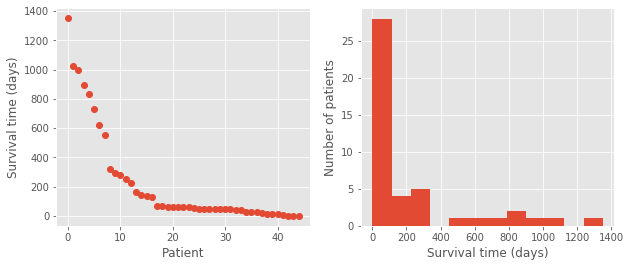

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(sorted(survival)[::-1], 'o')
ax1.set_xlabel('Patient')
ax1.set_ylabel('Survival time (days)')

ax2.hist(survival, bins = 'auto')
ax2.set_xlabel('Survival time (days)')
ax2.set_ylabel('Number of patients');

exponential distributionでfitを見てみる

The likelihood function of an exponential distributionは
$$
\mathcal{L}(\lambda, \{s_i\}) = P(\{s_i\} \mid \lambda) = \lambda^n \exp\left(-\lambda n \overline s\right)
$$

In [21]:
smean = survival.mean()
rate = 1. / smean
smax = survival.max()
days = np.linspace(0., smax, 1000)
dt = smax / 999.

In [22]:
dist_exp = st.expon.pdf(days, scale=1. / rate)

Text(0, 0.5, 'Number of patients')

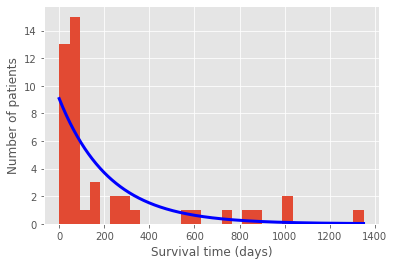

In [23]:
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(survival, nbins)
ax.plot(days, dist_exp * len(survival) * smax / nbins,
        '-b', lw=3)
ax.set_xlabel("Survival time (days)")
ax.set_ylabel("Number of patients")

MLE

In [24]:
dist = st.expon
args = dist.fit(survival)
args

(1.0, 222.2888888888889)

ks test

In [25]:
st.kstest(survival, dist.cdf, args)

KstestResult(statistic=0.36199693810792966, pvalue=8.647045785208746e-06)

the Birnbaum-Sanders distribution 

In [26]:
dist_bs = st.fatiguelife
args_bs = dist_bs.fit(survival)
st.kstest(survival, dist_bs.cdf, args)

KstestResult(statistic=0.7111111111111111, pvalue=1.7674200301054493e-23)

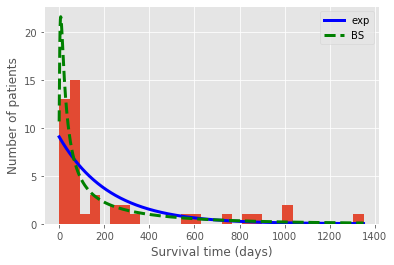

In [27]:
dist_fl = dist_bs.pdf(days, *args_bs)
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(survival, nbins)
ax.plot(days, dist_exp * len(survival) * smax / nbins,
        '-b', lw=3, label='exp')
ax.plot(days, dist_fl * len(survival) * smax / nbins,
        '--g', lw=3, label='BS')
ax.set_xlabel("Survival time (days)")
ax.set_ylabel("Number of patients")
ax.legend();

In [28]:
L_exp = np.sum(np.log(dist.pdf(survival, *args)))
L_bs = np.sum(np.log(dist_bs.pdf(survival, *args_bs)))
print(L_exp, L_bs)

-288.1790026746687 -280.34546260729104
